In [47]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

model = yolov8_heatmap(
    weight="/mnt/nvme_disk2/User_data/hp927k/phase2/BBPrediction/runs/detect/train2/weights/best.pt",
    method="HiResCAM",
)


imagelist = model(
    img_path="/mnt/nvme_disk2/User_data/hp927k/phase2/BBPrediction/images/val/RIVAS SEGURA, LUIS - 3mensio Screen Recording_longitudinal_view_314.png", 
    )


Model summary: 129 layers, 3,011,433 parameters, 0 gradients, 8.2 GFLOPs


In [48]:
len(imagelist)

1

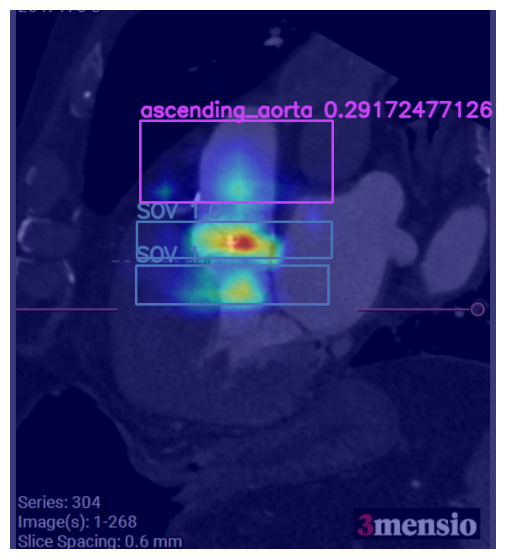

In [49]:
display_images(imagelist)

In [4]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import os
from glob import glob

# Initialize the model with yolov8_heatmap
model = yolov8_heatmap(
    weight="/mnt/nvme_disk2/User_data/hp927k/phase2/BBPrediction/runs/detect/smallDatasetFinal/weights/best.pt",
    method="HiResCAM",  # Choose the desired CAM method
    # device="cuda:1"  # Use GPU 1
)

# Path to the validation images directory
val_dir = "/mnt/nvme_disk2/User_data/hp927k/phase2/BBPrediction/images/val/"
output_dir = os.path.join(val_dir, "gradcam_outputs")

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get a list of image paths in the validation directory
image_paths = glob(os.path.join(val_dir, "*.png"))  # Adjust the extension if necessary

# Process and display Grad-CAM for the first 10 images
for img_path in image_paths[:3]:
    imagelist = model(img_path=img_path)
    display_images(imagelist)
    
    # Save the generated images
    # for i, img in enumerate(imagelist):
    #     output_path = os.path.join(output_dir, f"{os.path.basename(img_path).split('.')[0]}_heatmap_{i}.png")
    #     img.save(output_path)


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [3]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import os
from glob import glob
import torch

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"


model = yolov8_heatmap(
    weight="/mnt/nvme_disk2/User_data/hp927k/phase2/BBPrediction/runs/detect/train2/weights/best.pt",
    method="HiResCAM",  # Choose the desired CAM method
)


val_dir = "/mnt/nvme_disk2/User_data/hp927k/phase2/BBPrediction/images/val/"


image_paths = glob(os.path.join(val_dir, "*.png"))  # Adjust the extension if necessary



for img_path in image_paths[:10]:  # Process the first 10 images
    # Run the model to get detections
    results = model(img_path=img_path)
    
    # Initialize a dictionary to store the highest confidence detection for each class
    best_detections = {}
    
    # Iterate over the detections
    for det in results:
        print(det)
    
        # # If this class is not yet in the dictionary or the current confidence is higher, update it
        # if cls not in best_detections or conf > best_detections[cls].conf:
        #     best_detections[cls] = det
    
    # Extract the filtered detections
    filtered_detections = list(best_detections.values())
    
    # Generate Grad-CAM visualization for the filtered detections
    imagelist = model.generate_cam(img_path=img_path, detections=filtered_detections)
    
    # Display the resulting image
    display_images(imagelist)


Model summary: 129 layers, 3,011,433 parameters, 0 gradients, 8.2 GFLOPs
<PIL.Image.Image image mode=RGB size=576x640 at 0x7E92F5DE9E40>


AttributeError: 'yolov8_heatmap' object has no attribute 'generate_cam'